In [2]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
%pip install h5py graphviz pydot

data = pd.read_csv('BankChurners.csv')
pd.set_option('display.max_columns', None)

Note: you may need to restart the kernel to use updated packages.


In [3]:
data.dropna(inplace = True)
print(f'dataframe rows: {data.shape[0]} \ndataframe columns: {data.shape[1]} \n')
cats = data.select_dtypes(include = ['object', 'category'])
nums = data.select_dtypes(include = 'number')

display(cats.head(4))
display(nums.head(2))

dataframe rows: 10127 
dataframe columns: 21 



,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [4]:
frame = data.copy()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in cats:
  frame[i] = encoder.fit_transform(frame[i])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in nums:
  frame[[i]] = scaler.fit_transform(frame[[i]])

print(f'Transformed Dataset')
display(frame.head())

y = frame.Attrition_Flag
x = frame.drop(['Attrition_Flag'], axis = 1)

Transformed Dataset


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.802878,1,-0.165406,1,0.503368,3,1,2,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,2.156861,1,0.333570,0,2.043199,2,2,4,0,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,-0.682769,1,0.583058,1,0.503368,2,1,3,0,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,0.832862,1,-0.789126,0,1.273283,3,3,4,0,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.814896,1,-0.789126,1,0.503368,5,1,2,0,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

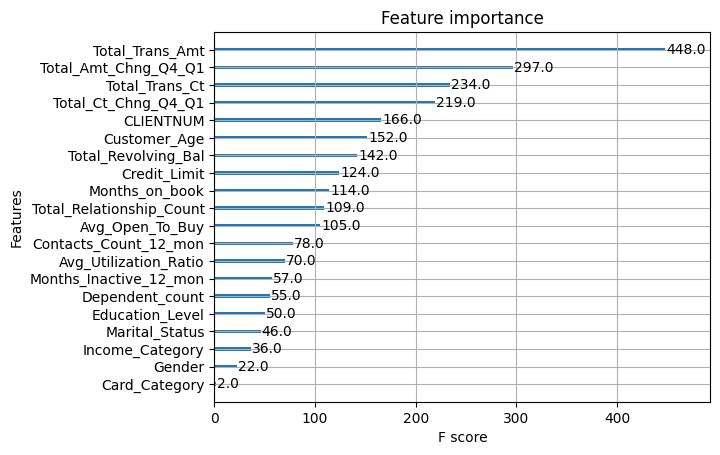

In [5]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x,y)

xgb.plot_importance(model)

In [6]:
sel = ['Customer_Age', 'Dependent_count',
       'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Months_on_book',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

new_frame = x[sel]
new_frame.head()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Months_on_book,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.503368,0.763943,-1.327136,0.384621,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,2.043199,1.407306,-1.327136,1.010715,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.503368,0.120579,-1.327136,0.008965,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,1.273283,-0.522785,1.641478,-0.241473,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,0.503368,0.763943,-1.327136,-1.869317,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(new_frame, y, test_size = 0.08, random_state = 100004560, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (9316, 14)
x_test: (811, 14)
y_train: (9316,)
y_test: (811,)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 15, activation = 'relu'),
    tf.keras.layers.Dense(40, activation = 'relu'),
    tf.keras.layers.Dense(35, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 30 )

Epoch 1/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8556 - loss: 0.4030
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.2417
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9256 - loss: 0.1964
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9228 - loss: 0.1895
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9259 - loss: 0.1826
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9278 - loss: 0.1807
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9334 - loss: 0.1605
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9355 - loss: 0.1630
Epoch 9/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9394 - loss: 0.1557
Epoch 10/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9379 - loss: 0.1519
Epoch 11/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9402 - loss: 0.1446
Epoch 12/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [9]:
score = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test Loss: {score[0]}\Test Accuracy: {score[1]}')

Test Loss: 0.15367752313613892\Test Accuracy: 0.9408138394355774


In [10]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  #............................................... set a 50% confidence level that the customer doesnt stop buying
outcome = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
outcome

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Actual,Predicted
5259,1,1
8417,1,1
7862,1,1
4095,1,1
8400,1,1
...,...,...
7910,1,1
3146,1,1
8022,0,0
7748,0,0


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       120
           1       0.97      0.96      0.97       691

    accuracy                           0.94       811
   macro avg       0.87      0.90      0.89       811
weighted avg       0.94      0.94      0.94       811



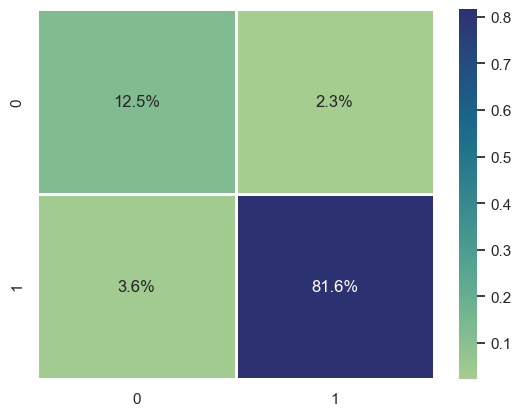

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

revealer = confusion_matrix(y_pred, y_test)
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

print(classification_report(y_pred, y_test))

In [15]:
model.save('BankChurners.keras')
